# Prediction of Netflix stock price with DTR* and LR**
*DTR = Decision Tree Regressor

**LR = Linear Regressor



In [ ]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

## Importing Modules

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

## Load Data

In [10]:
nflx = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stock Price Prediction/data_csv/NFLX-070119-070120.csv')
nflx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-02,374.890015,376.000000,370.309998,375.429993,375.429993,3625000
1,2019-07-03,376.690002,381.989990,375.839996,381.720001,381.720001,3799000
2,2019-07-05,378.290009,381.399994,375.559998,380.549988,380.549988,3732200
3,2019-07-08,378.190002,378.250000,375.359985,376.160004,376.160004,3113400
4,2019-07-09,379.059998,384.760010,377.500000,379.929993,379.929993,6932800


## Visualize Data

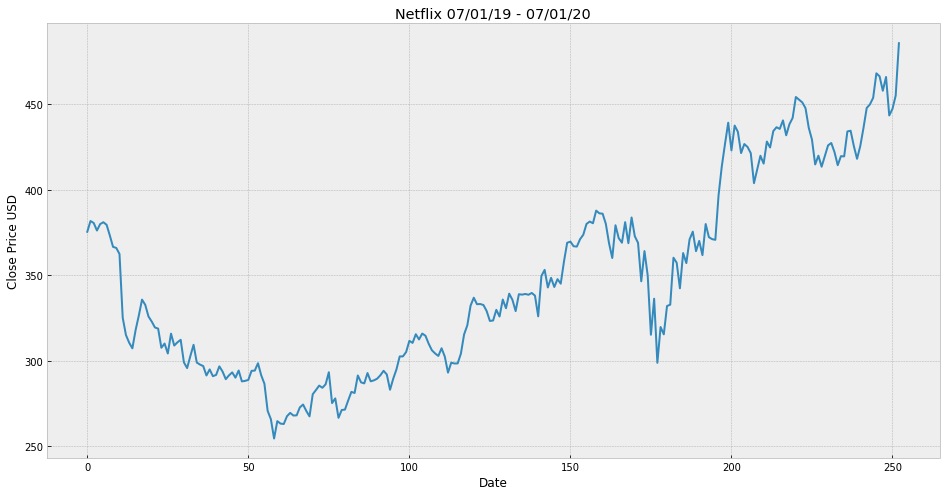

In [11]:
plt.figure(figsize=(16,8))
plt.title('Netflix 07/01/19 - 07/01/20')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(nflx.Close)
plt.show()

## Storing Close Price

In [12]:
df = nflx[['Close']]
df.head()

,Close
0,375.429993
1,381.720001
2,380.549988
3,376.160004
4,379.929993


## Create variable to prediction and column target
Variable will correspond to 'x' days out into the future

New column (target) shifted 'x' units/days up

In [ ]:
# Variable
future_days = 25
# New column
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail()

## Create feature data set X
Creating a new feature data set and converting it to a numpy array and removing the last x rows

In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X

## Create target data set Y
Creating Y and converting it to a numpy array and getting all of targets values except the last x rows

In [ ]:
Y = np.array(df['Prediction'])[:-future_days]
Y

## Split Train and Test data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25)

## Create Prediction Models

In [41]:
# Decision Tree Regressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Linear Regression
lr = LinearRegression().fit(x_train, y_train)

## Get the last 'x' rows

In [ ]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

## Tree Prediction

In [43]:
tree_prediction = tree.predict(x_future)
tree_prediction

array([413.440002, 419.730011, 434.480011, 427.309998, 421.970001,
       414.329987, 485.640015, 419.48999 , 434.049988, 434.480011,
       419.890015, 418.070007, 425.5     , 436.130005, 419.890015,
       414.769989, 453.720001, 468.040009, 466.26001 , 457.850006,
       465.910004, 443.399994, 447.23999 , 455.040009, 485.640015])

## Linear Prediction

In [44]:
lr_prediction = lr.predict(x_future)
lr_prediction

array([425.75934076, 430.69287058, 429.09505882, 425.72195805,
       409.32355775, 416.85469337, 424.29235633, 420.01287626,
       432.04770596, 428.80540356, 437.75678775, 439.87782195,
       438.96211846, 443.6059921 , 435.47689574, 441.50363524,
       444.94217817, 456.37899012, 454.87462298, 453.43569707,
       450.28683742, 439.61619625, 433.14094367, 419.54568585,
       424.32973997])

## Visualizing Predictions

### DTR

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


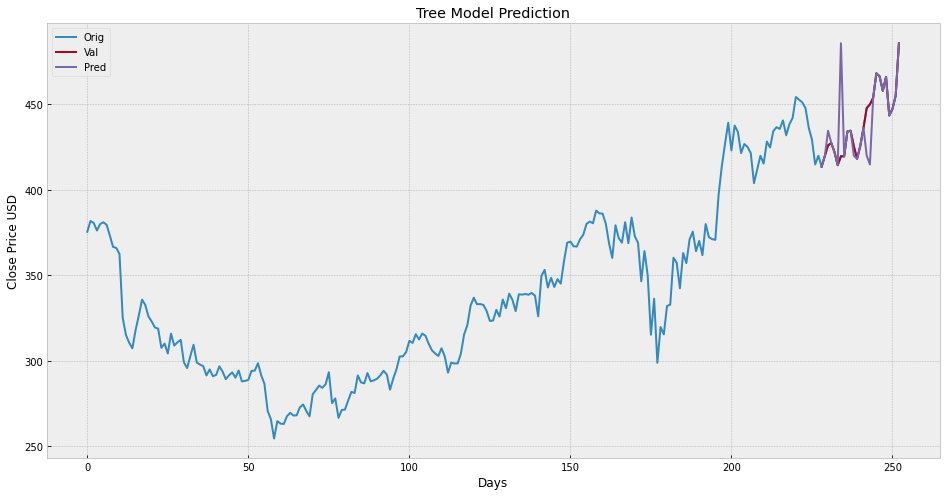

In [46]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tree Model Prediction')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

### LR

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


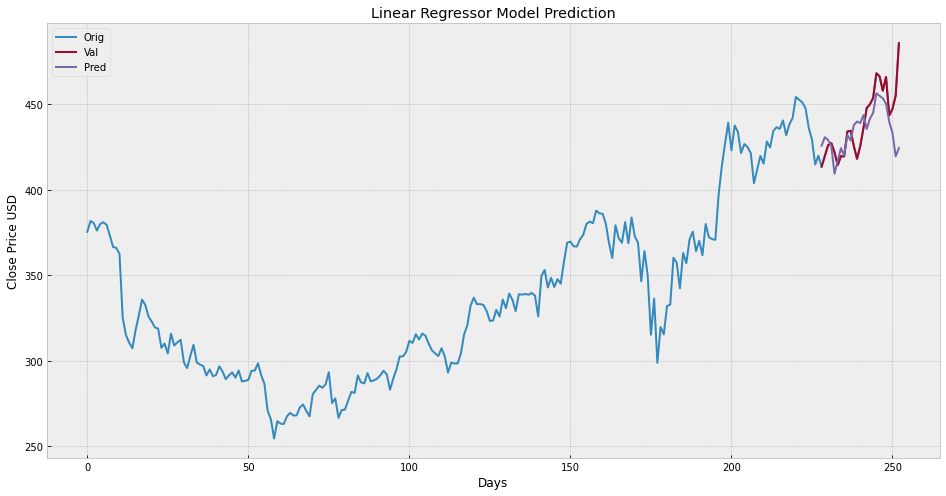

In [47]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regressor Model Prediction')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()